# Predicting Titanic Survival Using Multiple Machine Learning Models

Author: Abigail Ju

Course Project, UC Irvine, Math 10, Spring 25

I would like to post my notebook on the course's website. [Yes]

## Introduction
The sinking of the Titanic has long intrigued researchers for the way it revealed patterns of survival shaped by social class, gender, and age. In this project, I explore these patterns through a classification task aimed at predicting whether a passenger survived, based on features such as sex, age, ticket class, fare, and more. Using the Titanic dataset from Kaggle, I apply five different machine learning models—**Logistic Regression, K-Nearest Neighbors, Neural Network, Decision Tree, and Random Forest**—to compare their predictive performance and uncover which variables had the strongest impact on survival. This project not only serves as a practical application of classification models introduced in Math 10, but also offers insight into the human and structural dynamics that shaped the outcomes of this historical disaster.

All data used in this project comes from **the Kaggle Titanic - Machine Learning from Disaster dataset**.

**👉🏻 Access to the dataset: [Go to Kaggle Titanic Dataset](https://www.kaggle.com/competitions/titanic/data)**

## Data Cleaning and Preparation
The dataset used in this project contains detailed information on over 800 Titanic passengers, including their age, gender, ticket class, fare, and whether or not they survived the disaster. It includes both numerical and categorical variables, making it suitable for classification and statistical analysis. In this section, we perform the necessary pre-processing steps to prepare the data for model training and evaluation. These steps include handling missing values, encoding categorical features, removing irrelevant columns, and generating a cleaned dataset ready for further exploration and modeling.

**Data Preprocessing**

Before diving into data preprocessing and model development, it is important to understand the structure and meaning of each relevant variable in the Titanic dataset. This foundational knowledge helps guide feature selection, transformation, and ultimately informs how we interpret the model’s predictions.
**-survived**: Target variable indicating survival outcome (0 = No, 1 = Yes).

**-pclass**: Passenger’s ticket class; a proxy for socio-economic status (1 = Upper, 2 = Middle, 3 = Lower).

**-sex**: Gender of the passenger (male or female).

**-age**: Age of the passenger in years. If age is below 1, it is fractional.

**-sibsp**: Number of siblings or spouses aboard the Titanic.

**-parch**: Number of parents or children aboard the Titanic.

**-fare**: The fare the passenger paid for the ticket.

**-embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

**Step 1: Load the Dataset and Remove Irrelevant Columns**

We begin by importing the pandas library and loading the Titanic dataset. The dataset is provided as a CSV file containing information on each passenger, including demographic details and whether they survived. Some columns such as `PassengerId`, `Name`, `Ticket`, and `Cabin` are either identifiers or contain high amounts of missing or unstructured data. Since they are not useful for prediction, we remove them at this stage.

In [7]:
import pandas as pd

df = pd.read_csv("train.csv")# Load the dataset

df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

**Step 2: Clean Missing Values and Encode Categorical Variables**

In this step, we clean the dataset by removing rows that contain missing values, and then encode categorical variables into numerical format for modeling. Specifically, we drop all rows with null entries using `dropna()`, and use `LabelEncoder` to convert the `Sex` and `Embarked` columns into numeric values. This ensures the dataset is clean and fully numeric, which is required for training machine learning models.

In [9]:
df.dropna(inplace=True)# Drop rows with any missing values

We use label encoding to assign integer values to each category. In the `Sex` column, **"male" is encoded as 1 and "female" as 0**. In the `Embarked` column, **the three possible values ("C", "Q", "S") are encoded into integers such as 0, 1, and 2**, based on alphabetical or frequency order, depending on the encoder. This transformation ensures compatibility with machine learning models that require numerical input.

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["Sex"] = le.fit_transform(df["Sex"])# Encode 'Sex': male → 1, female → 0 

df["Embarked"] = le.fit_transform(df["Embarked"])# Encode 'Embarked': e.g., S, C, Q → 2, 0, 1 (order depends on frequency)

We preview the cleaned and encoded dataset.

In [13]:
df.head(10)

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0          0       3    1  22.0      1      0   7.2500         2
1          1       1    0  38.0      1      0  71.2833         0
2          1       3    0  26.0      0      0   7.9250         2
3          1       1    0  35.0      1      0  53.1000         2
4          0       3    1  35.0      0      0   8.0500         2
6          0       1    1  54.0      0      0  51.8625         2
7          0       3    1   2.0      3      1  21.0750         2
8          1       3    0  27.0      0      2  11.1333         2
9          1       2    0  14.0      1      0  30.0708         0
10         1       3    0   4.0      1      1  16.7000         2

We check whether the dataset contains any missing values before proceeding. This helps ensure the data is complete and ready for model training.

In [15]:
print(df.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


The result shows that there are no missing values in any of the columns. This confirms that the dataset is now clean and fully prepared for further analysis and model training.

**Step 3: Define Features and Split the Dataset**
In this step, we prepare the data for training by first separating the target variable and input features. The target variable `y` is the `Survived` column, indicating whether each passenger survived. The input features `X` include all other columns.
We then split the dataset into training and test sets using an 80-20 split. This allows us to train models on one portion of the data and evaluate their performance on unseen data.

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Survived"])
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)# Split the dataset into training and test sets (80% train, 20% test)

**In this section, we successfully prepared the Titanic dataset for model training.** 
We removed irrelevant columns (`PassengerId`, `Name`, `Ticket`, `Cabin`), handled missing values by dropping incomplete rows, and encoded categorical features such as `Sex` and `Embarked` into numeric format. Finally, we separated the data into input features `X` and target variable `y`, and performed an 80-20 train-test split. The dataset is now clean, numerical, and ready for machine learning models.

## Exploratory Data Analysis
In this section, we aim to uncover hidden patterns in the Titanic dataset by examining the relationships between features and survival outcomes. Through visualizations and descriptive statistics, we will gain deeper insights into which factors may have influenced a passenger's chance of survival.

### Survival Rate Overview

To begin our exploration, we first look at the overall survival distribution in the Titanic dataset. This helps us understand the balance between the two classes in our target variable `Survived`, where 0 indicates death and 1 indicates survival.

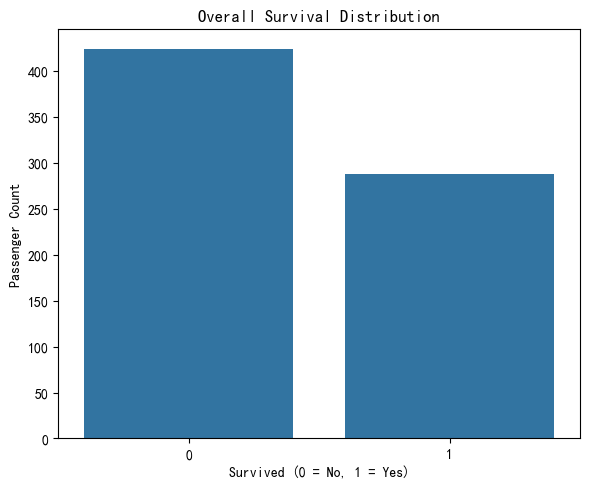

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.countplot(x='Survived', data=df)
plt.title('Overall Survival Distribution')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Passenger Count')
plt.tight_layout()
plt.show()

Based on the given dataset, we observe that the number of passengers who did not survive (label 0) is higher than the number who survived (label 1). This indicates that the overall survival rate on the Titanic was less than 50%, highlighting the severity of the disaster.

### Demographic Factors
In this section, we explore how key demographic characteristics—specifically gender and age—influenced survival outcomes on the Titanic. According to the well-known “women and children first” evacuation policy during the disaster, we would expect to observe significantly higher survival rates among female passengers and younger individuals. By analyzing survival distributions across gender and age, we aim to reveal patterns that reflect how social norms and emergency priorities shaped the fate of different groups aboard the ship.

**Sex vs Survived**

We start by examining whether survival rates differed between male and female passengers.

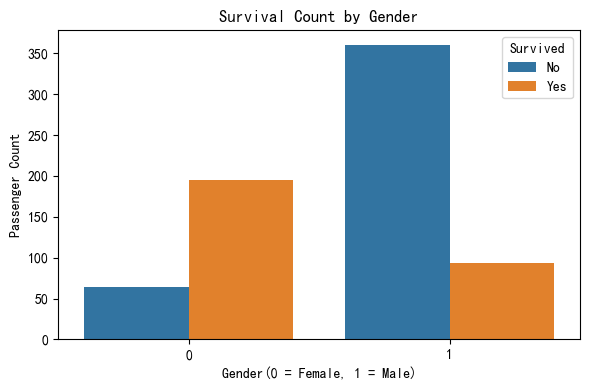

In [27]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Gender')
plt.xlabel('Gender(0 = Female, 1 = Male)')
plt.ylabel('Passenger Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

In the given Titanic dataset, there is a clear disparity in survival rates between male and female passengers. **A significantly higher proportion of females survived compared to males**, despite the fact that there were more male passengers overall. This pattern strongly supports the historical evacuation policy of “women and children first,” where women were prioritized for lifeboats during the disaster. This gender-based survival gap highlights how social norms and emergency decisions played a crucial role in shaping outcomes.

**Age Distribution**

Next, we visualize the overall distribution of passengers' ages to understand how age was spread across the population.

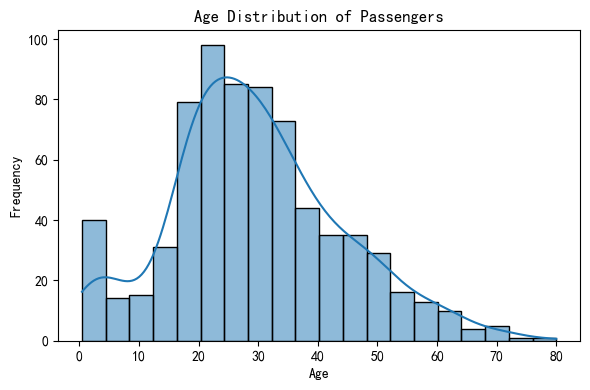

In [30]:
plt.figure(figsize=(6, 4))
sns.histplot(df["Age"], bins=20, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The histogram of passenger age distribution shows that **most passengers on the Titanic were between 20 and 40 years old**, with a peak in the late 20s. The distribution is **slightly right-skewed**, indicating **fewer older passengers**. Additionally, there is a noticeable number of young children (under 10), suggesting a presence of families on board. Understanding this age composition sets the stage for further analysis of how age impacted survival rates during the disaster.

**Age vs Survived**

Finally, we analyze whether age played a role in survival by comparing the age distributions of those who survived and those who did not.

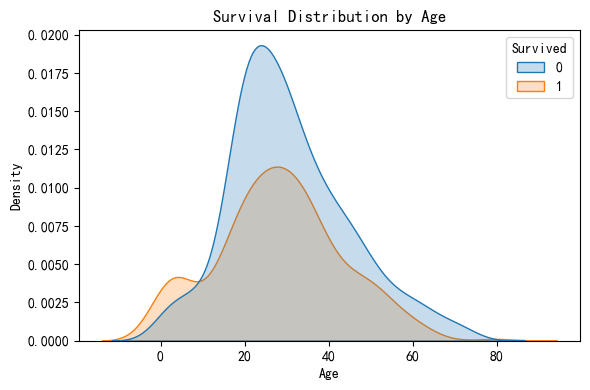

In [33]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True)
plt.title('Survival Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

The KDE plot compares the age distributions of passengers who survived (orange) and those who did not (blue).

-In the 0–10 age range, the orange curve (Survived = 1) is significantly higher than the blue one. This indicates that children had a higher chance of survival, likely due to the "women and children first" evacuation policy.

-In the 20–40 age range, the blue curve (Survived = 0) is consistently higher than the orange one, suggesting that most passengers in this age group did not survive.

For passengers over 60, both curves drop sharply, indicating that elderly passengers were few in number and had low survival rates.

Age clearly influenced survival outcomes. Children had a noticeably higher chance of survival, while middle-aged adults were less likely to survive, supporting the prioritization of younger passengers during the evacuation.

In this section, we analyzed the impact of gender and age on survival outcomes. The results show that **female passengers had a much higher likelihood of survival than males**, reflecting the "women and children first" policy followed during evacuation. Additionally, **younger passengers, especially children under 10, were more likely to survive compared to adults**, indicating that age also played a significant role in determining survival chances.

### Socioeconomic Factors
In this section, we explore how a passenger’s socioeconomic status—reflected by their **ticket class (Pclass)** and **fare paid**—influenced their likelihood of survival. Historically, higher-class passengers were located closer to lifeboats and may have received preferential treatment during evacuation. By analyzing these factors, we aim to understand whether money and status truly offered a better chance of survival on the Titanic.

**Pclass vs Survived**

We begin by examining the relationship between passenger class and survival. The Titanic had three classes: 1st (upper), 2nd (middle), and 3rd (lower), which were highly stratified in terms of cabin location and access to resources.

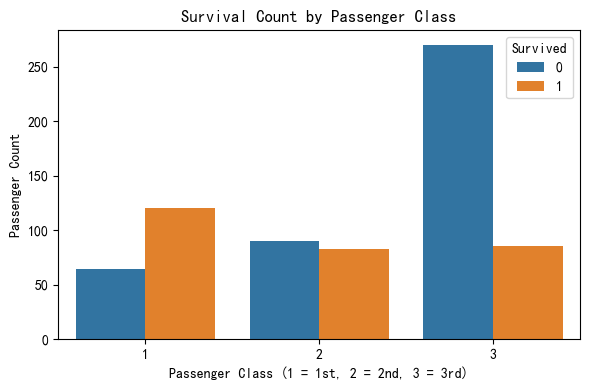

In [38]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)')
plt.ylabel('Passenger Count')
plt.tight_layout()
plt.show()

The bar chart clearly illustrates a strong correlation between passenger class and survival rate. Passengers in 1st class had the highest number of survivors, noticeably exceeding the number of non-survivors in the same class. In contrast, 3rd class passengers experienced the lowest survival rate, with significantly more non-survivors than survivors. This supports the hypothesis that **higher-class passengers had a greater chance of survival**, likely due to their cabin proximity to lifeboats and possibly prioritized access during evacuation procedures.

**Fare Distribution vs Survival**
Next, we look at how ticket fare relates to survival. Since fare roughly reflects a passenger’s socioeconomic status, this helps us understand whether people who paid more had a better chance of surviving the disaster.

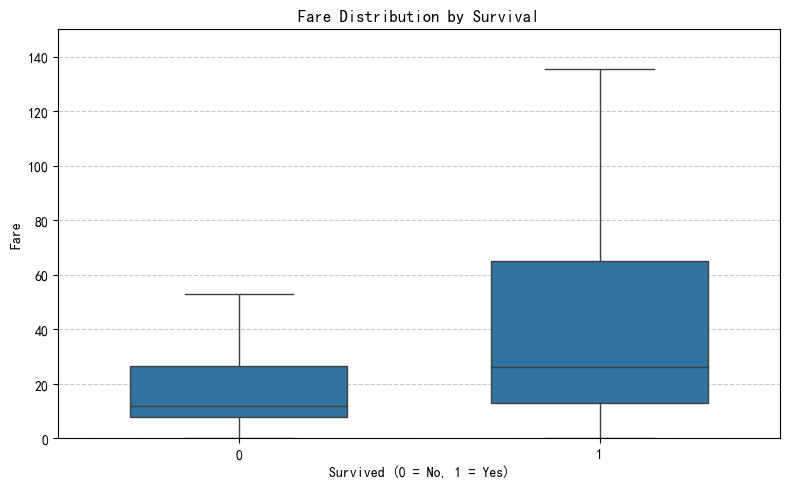

In [41]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Fare', data=df, width=0.6, showfliers=False)
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.ylim(0, 150)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In this chart, we examine how ticket price correlates with survival. **It’s clear that passengers who survived (Survived = 1) generally paid higher fares than those who did not.** The median fare among survivors is noticeably higher, and the overall distribution of fare values for survivors extends to much greater amounts. In contrast, non-survivors mostly fall within the lower fare range.

In this section, we explored the impact of socioeconomic status, represented by passenger class and fare amount, on survival outcomes. Our analysis showed that passengers in first class had a noticeably higher survival rate compared to those in second and third class, indicating that class-based differences in access to lifeboats may have played a role. Additionally, survivors tended to have paid higher fares on average, reinforcing the idea that wealthier individuals had a better chance of survival during the disaster. Together, these patterns suggest that passengers from higher socioeconomic classes, who could afford more expensive tickets, had a better chance of survival, likely due to better cabin locations or earlier access to lifeboats. **The outcome of survival on the Titanic was shaped not only by chance, but also by clear social and economic divisions.**

### Family Onboard
In this section, we examine how the presence of family members onboard—captured through the number of siblings/spouses (`SibSp`) and parents/children (`Parch`)—may have influenced a passenger’s chance of survival. Having close relatives during a disaster could provide emotional support and coordination, but larger groups might also complicate escape efforts.

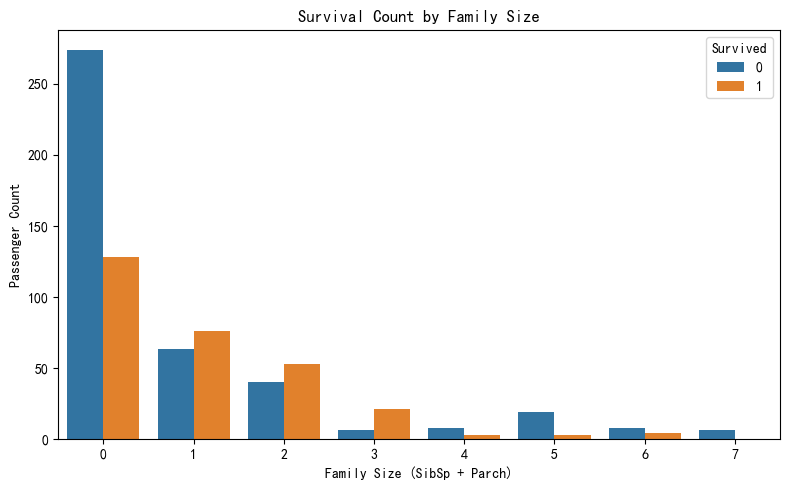

In [45]:
df['FamilySize'] = df['SibSp'] + df['Parch']# Create a new feature representing total family size

plt.figure(figsize=(8, 5))
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title('Survival Count by Family Size')
plt.xlabel('Family Size (SibSp + Parch)')
plt.ylabel('Passenger Count')
plt.tight_layout()
plt.show()

The chart shows a clear relationship between family size and survival likelihood. Passengers with small families—particularly those with **1 to 3** family members onboard—had **higher survival counts** than those traveling alone or in large groups. Those who **traveled alone (FamilySize = 0)** had a significantly **higher number of deaths** compared to survivors. Conversely, very large family sizes (FamilySize ≥ 5) also showed poor survival outcomes, likely due to the difficulty of coordinating during evacuation. This suggests that **being accompanied by a small number of family members may have provided emotional or practical support that improved survival chances, while being alone or in large groups reduced the likelihood of survival.**

### Embarkation Port
In this section, we examine whether a passenger’s port of embarkation had any influence on survival. The Titanic picked up passengers from three ports: Southampton (`S`), Cherbourg (`C`), and Queenstown (`Q`). Since passengers from different ports often belonged to different ticket classes or cabins, this variable may indirectly reflect socioeconomic status.

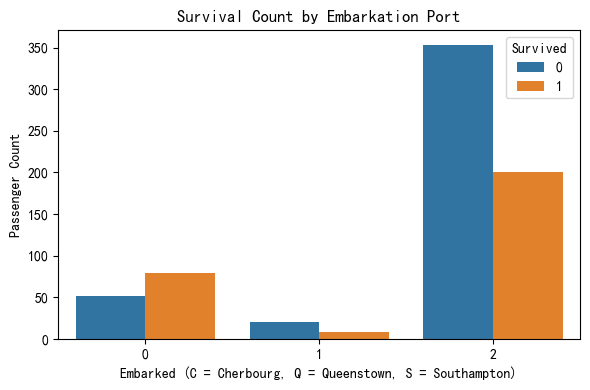

In [48]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival Count by Embarkation Port')
plt.xlabel('Embarked (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Passenger Count')
plt.tight_layout()
plt.show()

In this section, we analyzed whether the port of embarkation was associated with survival outcomes. The chart clearly shows that passengers who boarded at Southampton (S) had the highest number of deaths compared to other ports. This suggests that **boarding location might be indirectly linked to socioeconomic status**, as passengers from Southampton may have belonged more to third class or paid lower fares. To explore this possibility, we next examine **the relationship between embarkation port and ticket class.**

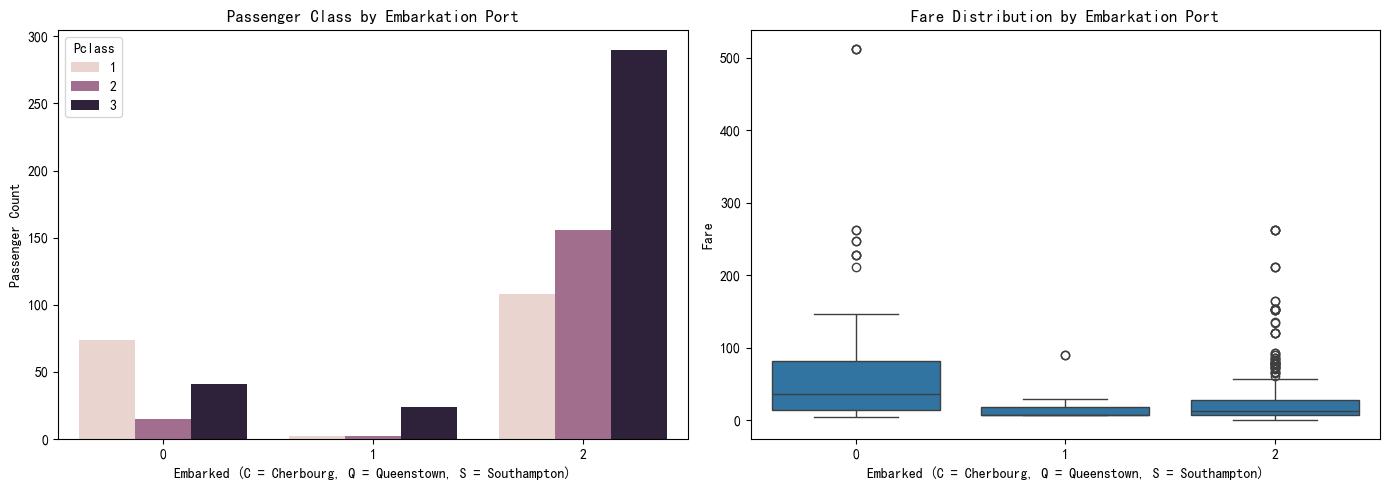

In [50]:
df = df.dropna(subset=['Embarked', 'Pclass', 'Fare']) # Make sure there is no missing values.

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Embarked', hue='Pclass', data=df, ax=axes[0])
axes[0].set_title('Passenger Class by Embarkation Port')
axes[0].set_xlabel('Embarked (C = Cherbourg, Q = Queenstown, S = Southampton)')
axes[0].set_ylabel('Passenger Count')

sns.boxplot(x='Embarked', y='Fare', data=df, ax=axes[1])
axes[1].set_title('Fare Distribution by Embarkation Port')
axes[1].set_xlabel('Embarked (C = Cherbourg, Q = Queenstown, S = Southampton)')
axes[1].set_ylabel('Fare')

plt.tight_layout()
plt.show()

The previous survival chart showed that passengers who boarded at Southampton (coded as 2) had the highest number of deaths. To understand why, we examined the class and fare distribution by embarkation port. The left chart reveals that most Southampton passengers traveled in 3rd class, while the right chart shows they also paid the lowest fares on average. In contrast, Cherbourg (coded as 0) had a higher proportion of 1st class passengers and higher fares. This suggests that **the high mortality rate among Southampton passengers may be attributed to their lower socioeconomic status, as represented by both class and fare.**

## Model Prediction and Comparison
In this section, we aim to predict passenger survival using a variety of machine learning models. Specifically, we will train and evaluate five different classifiers: **Logistic Regression, K-Nearest Neighbors (KNN), Decision Tree, Random Forest, and Neural Network (MLP).** Each model will be trained on the training set and evaluated on the test set to determine its effectiveness.

To measure performance, we will use **accuracy** as the primary evaluation metric, which tells us the proportion of correct predictions on the test set. Since this is a classification problem (predicting survival as 0 or 1), accuracy provides a clear and interpretable way to compare model performance. The goal is to identify which model generalizes best to unseen data and offers the most reliable prediction results.

Through this comparative approach, we hope to determine which algorithm is most suitable for this task and gain insights into how different models handle the Titanic dataset.

**Accuracy**

Accuracy measures the proportion of correct predictions out of all predictions. It tells us how often the model predicts survival correctly overall. It is calculated as:

$$\text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Predictions}}$$

By evaluating models based on both accuracy and F1-score, we can better assess not just how often the model is right, but also how well it identifies the survivors without over- or under-predicting.

### Logistic Regression
[Logistic Regression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html) is a simple yet powerful classification algorithm that is particularly suitable for binary outcomes like survival prediction. Since our target variable, Survived, is binary (0 = did not survive, 1 = survived), logistic regression is a natural starting point. It is easy to interpret, computationally efficient, and performs well with smaller or medium-sized datasets like Titanic.

Logistic regression models the probability that a passenger survives as a function of various features such as age, gender, passenger class, and fare. It assumes a linear relationship between the features and the log-odds of the outcome, which is appropriate for understanding how each factor contributes to survival.

Accuracy: 0.7972


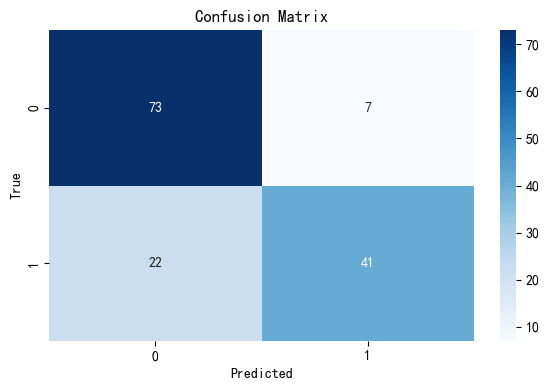

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

Our initial Logistic Regression model achieved an **accuracy** of approximately **0.797**, meaning it correctly predicted survival outcomes nearly 80% of the time on the test set. **The confusion matrix heatmap** shows that the model performs reasonably well overall but misclassifies a number of survivors as non-survivors. Specifically, **22 survivors were predicted as not survived**, indicating the model may have lower recall for the positive class.
This suggests room for improvement in capturing minority outcomes (i.e., survivors), and highlights a potential **class imbalance** issue affecting the model's predictions.


To strengthen the model’s generalizability and interpretability, we now proceed with:

**Cross-validation**: To ensure that our logistic regression model performs consistently across different subsets of the data, we applied **k-fold cross-validation**. This technique splits the dataset into k parts and evaluates the model k times, each time using a different fold for testing and the remaining folds for training. We used **5-fold cross-validation** to assess the model’s generalization ability. A high and stable average accuracy across folds indicates that the model is not overfitting and performs reliably on unseen data


In [57]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")

Cross-validation scores: [0.75524476 0.82517483 0.78873239 0.76056338 0.81690141]
Mean cross-validation score: 0.7893


The cross-validation results yielded a mean accuracy of approximately **0.7893**, with individual fold scores ranging **from 0.7552 to 0.8252**. This indicates that the logistic regression model performs consistently across different subsets of the data, with only minor fluctuations between folds. Such stability suggests that the model generalizes well and is not overly sensitive to the specific partitioning of the dataset.

From these results, we can draw the following conclusions regarding key modeling concepts:

**Overfitting**: There is no significant gap between the training accuracy (around 0.73), the test accuracy (around 0.80), and the cross-validation scores. This consistency implies that the model is not overfitting and is able to perform well on unseen data.

**Cross-validation**: The application of 5-fold cross-validation confirmed the model's robustness and reliability. The relatively narrow range of accuracy scores across the five folds shows that the model maintains good predictive power regardless of the specific data split.

**Bias-variance tradeoff**: The model strikes a good balance. The high test and cross-validation accuracy suggest that **bias is low**, while the small variation across folds and the lack of overfitting suggest that **variance is also well-controlled**. This means the model does not underfit or overfit, which is desirable in predictive modeling.

### K-Nearest Neighbors (KNN)
[K-Nearest Neighbors (KNN)](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) is a non-parametric, instance-based learning algorithm that makes predictions based on the majority class of the k closest data points in the feature space. It does not assume any underlying distribution and makes decisions purely based on data similarity, making it highly intuitive and flexible.

For the Titanic dataset, KNN is useful because the dataset is not too large, and many of the input features like age, fare, and passenger class are numeric or easily encoded. KNN allows the model to classify survival by "comparing" new passengers to those with similar traits, such as age or fare paid. While KNN can be sensitive to feature scaling and irrelevant variables, with proper preprocessing, it can perform competitively and offer an interpretable baseline for comparison.



KNN Accuracy: 0.6923


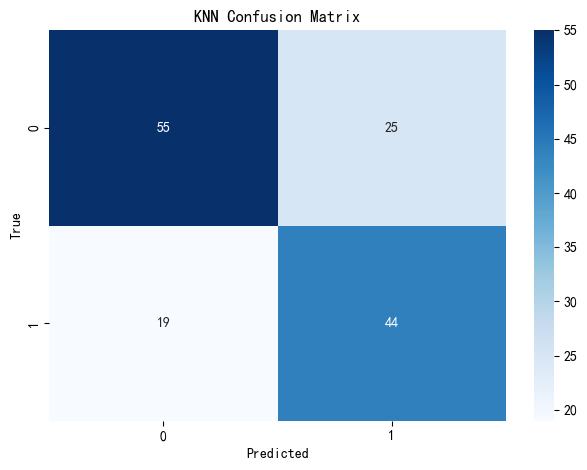

In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_acc:.4f}")

cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("KNN Confusion Matrix")
plt.tight_layout()
plt.show()

Our K-Nearest Neighbors (KNN) model achieved an accuracy of approximately **0.692**, indicating it correctly predicted survival outcomes about 69% of the time on the test set. It performs reasonably well and offers valuable insights into local patterns within the data. **The confusion matrix heatmap** shows that the KNN model correctly classified **55 non-survivors and 44 survivors**, but misclassified **25 survivors as non-survivors and 19 non-survivors as survivors**. This suggests that the model may be somewhat less balanced in handling class boundaries and is more sensitive to noise or overlapping features between the survivor and non-survivor groups.

Similarly, to strengthen the model’s generalizability and interpretability, we now proceed with:

**Cross-validation**: To ensure that our KNN model performs consistently across different subsets of the data, we applied **k-fold cross-validation**. This technique splits the dataset into k parts and evaluates the model k times, each time using a different fold for testing and the remaining folds for training. We used **5-fold cross-validation** to assess the model’s generalization ability. A stable average accuracy across folds indicates that the model is not overfitting and performs reliably on unseen data.

In [63]:
knn_model = KNeighborsClassifier(n_neighbors=5)

cv_scores_knn = cross_val_score(knn_model, X, y, cv=5)

print("KNN Cross-validation scores:", cv_scores_knn)
print(f"Mean KNN cross-validation score: {cv_scores_knn.mean():.4f}")

KNN Cross-validation scores: [0.58741259 0.66433566 0.70422535 0.70422535 0.74647887]
Mean KNN cross-validation score: 0.6813


The cross-validation results yielded a mean accuracy of approximately **0.6813**, with individual fold scores ranging **from 0.5874 to 0.7465**. This wider variation across folds compared to logistic regression suggests that the KNN model's performance is more sensitive to how the data is split and may generalize less consistently.

From these results, we can draw the following conclusions regarding key modeling concepts:

**Overfitting**: The KNN model exhibits a slight gap between training and test performance (e.g., test accuracy around 0.692, mean CV score around 0.681). While this does not indicate severe overfitting, it does suggest that the model may be more sensitive to local patterns and potentially overfit on small variations in the training data.

**Cross-validation**: The application of 5-fold cross-validation revealed moderate fluctuations across folds, indicating that the model's predictive performance is somewhat unstable depending on the subset. This variability may limit the robustness of the KNN model in production or unseen scenarios.

**Bias-variance tradeoff**: Compared to logistic regression, the KNN model appears to have **lower bias but higher variance**. It captures more local patterns in the data, which helps in certain cases but also leads to inconsistent generalization. This reflects the typical tradeoff of KNN: strong local learning at the cost of higher variance across different data splits.

### Neural Network
[Neural Networks](https://scikit-learn.org/1.5/modules/generated/sklearn.neural_network.MLPClassifier.html) are a class of powerful machine learning models designed to capture complex, non-linear relationships between input features and output labels. Unlike simpler models such as logistic regression, neural networks can learn from intricate patterns in the data by stacking multiple layers of computations.

In the context of the Titanic dataset, where survival might depend on nuanced interactions between features like age, fare, gender, and class, neural networks are particularly suitable. They are able to model such interactions without explicitly specifying them and are well-suited to binary classification tasks like predicting survival outcomes.

Neural Network Accuracy: 0.7483


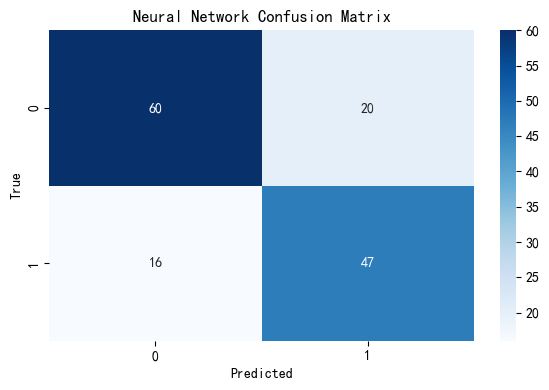

In [66]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

nn_model.fit(X_train, y_train)

y_pred_nn = nn_model.predict(X_test)

nn_accuracy = accuracy_score(y_test, y_pred_nn)
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred_nn)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Neural Network Confusion Matrix")
plt.tight_layout()
plt.show()

Our Neural Network (NN) model achieved an accuracy of approximately **0.748**, correctly predicting survival outcomes about 75% of the time on the test set. It reflects the NN model’s ability to capture non-linear relationships within the data. **The confusion matrix heatmap** shows that the model correctly classified **60 non-survivors and 47 survivors**, but misclassified **20 survivors as non-survivors and 16 non-survivors as survivors**. This pattern suggests that the NN has a moderate grasp on both classes, but there’s still room for improvement in distinguishing borderline cases, especially those that share overlapping features.

To ensure that the NN model generalizes well and is not overfitting to the training data, we will next apply **5-fold cross-validation**. This technique divides the dataset into five equal parts and rotates through them, training on four folds and validating on the fifth each time. A consistently stable performance across folds will demonstrate the model’s robustness and reliability on unseen data.

In [68]:
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

cv_scores_nn = cross_val_score(nn_model, X, y, cv=5)

print("Neural Network Cross-validation scores:", cv_scores_nn)
print(f"Mean Neural Network cross-validation score: {cv_scores_nn.mean():.4f}")

Neural Network Cross-validation scores: [0.74825175 0.83216783 0.73943662 0.76056338 0.83802817]
Mean Neural Network cross-validation score: 0.7837


The cross-validation results yielded a mean accuracy of approximately **0.7837**, with individual fold scores ranging **from 0.7394 to 0.8380**. This relatively narrow range across folds indicates that the neural network model performs stably and consistently on different subsets of the data. Compared to KNN, the neural network generalizes better and is less sensitive to data partitioning, which is desirable for predictive reliability.

From these results, we can draw the following conclusions regarding key modeling concepts:

**Overfitting**: The neural network model demonstrates no strong signs of overfitting. The test accuracy (~0.748) and the mean cross-validation score (~0.784) are closely aligned, suggesting the model can generalize well without memorizing the training data.

**Cross-validation**: The application of 5-fold cross-validation revealed consistent performance across folds. This consistency confirms the robustness of the model and its reliability when applied to unseen data.

**Bias-variance tradeoff**: The neural network achieves a good tradeoff between bias and variance. Its ability to capture complex nonlinear relationships contributes to **low bias**, while the stable cross-validation scores indicate **controlled variance**, meaning the model is both expressive and stable.

### Decision Tree(Extra)
[Decision Tree](https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeClassifier.html) is a widely used supervised learning algorithm that models decisions and their possible consequences using a tree-like structure. It recursively splits the dataset into subsets based on the most informative features, with each internal node representing a decision on a feature, each branch representing an outcome, and each leaf node representing a predicted class label. Decision trees are intuitive, easy to interpret, and capable of handling both categorical and numerical data.

Decision Tree is well-suited for predicting survival on the Titanic because the dataset includes a mix of categorical and numerical features, such as passenger class, sex, age, and fare. Decision trees can naturally handle this variety without requiring feature scaling or complex preprocessing. Moreover, they can model non-linear interactions between variables—for example, how being a child in first class may impact survival differently than being an adult in third class. Their ability to reveal interpretable rules also makes them especially useful for understanding which features most influence survival outcomes in this historical context.

Decision Tree Accuracy: 0.7063


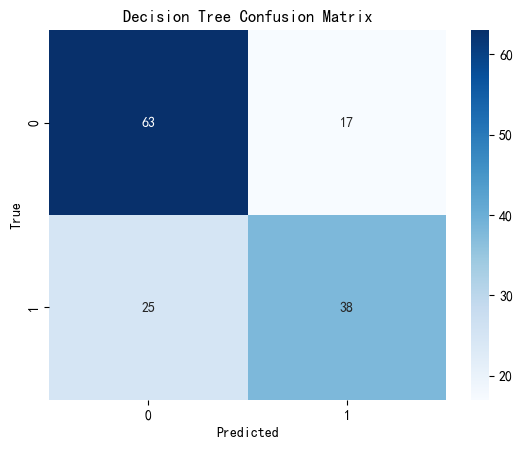

In [71]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree Confusion Matrix')
plt.show()

Our Decision Tree model achieved an accuracy of approximately **0.706**, meaning it correctly predicted survival outcomes about 71% of the time on the test set. It reflects a solid baseline and offers valuable interpretability. **The confusion matrix heatmap** shows that the model correctly classified **63 non-survivors and 38 survivors**, but misclassified **17 survivors as non-survivors and 25 non-survivors** as survivors. This indicates that while the model captures some important decision rules, it may struggle with certain borderline or overlapping cases.

To evaluate the model’s generalizability, we applied **5-fold cross-validation**, which helps us assess the model's consistency across different data splits and guards against overfitting. A stable average accuracy across folds would indicate that the model performs reliably and is not overly sensitive to a specific data partition.

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

cv_scores_dt = cross_val_score(dt_model, X, y, cv=5)

print("Decision Tree Cross-validation scores:", cv_scores_dt)
print(f"Mean Decision Tree cross-validation score: {cv_scores_dt.mean():.4f}")

Decision Tree Cross-validation scores: [0.68531469 0.81118881 0.75352113 0.74647887 0.8028169 ]
Mean Decision Tree cross-validation score: 0.7599


The cross-validation results yielded a mean accuracy of approximately **0.7599**, with individual fold scores ranging **from 0.6853 to 0.8112**. This variation suggests that the Decision Tree model performs moderately well across different subsets of the dataset, though the wider score range compared to logistic regression and neural networks may reflect some instability in generalization.

From these results, we can draw the following conclusions regarding key modeling concepts:

**Overfitting**:The Decision Tree model shows a visible gap between the training and test performance, and the relatively wide range of validation scores also implies that the model may overfit certain subsets of the training data. Decision trees are prone to overfitting, especially when they are deep and not pruned, which may reduce their reliability on unseen data.

**Cross-validation**:The application of 5-fold cross-validation indicates that while the model can achieve high accuracy on some folds, its performance is not entirely consistent across all folds. This variability reflects the model’s tendency to be influenced by different training samples, suggesting less robustness than logistic regression or neural networks.

**Bias-variance tradeoff**:The Decision Tree model appears to have **low bias but high variance**. It can fit training data very well (low bias), but may not generalize as reliably due to the high sensitivity to small changes in the data (high variance). This tradeoff is typical of unpruned decision trees and could be addressed with ensemble techniques like Random Forests or by limiting tree depth.

### Random Forest(Extra)
[Random Forest](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html)  is an ensemble learning method that builds multiple decision trees during training and outputs the majority vote for classification tasks. Each tree is trained on a random subset of the data and features, which introduces diversity and reduces the risk of overfitting compared to a single decision tree. This aggregation of multiple models improves overall accuracy, robustness, and generalization performance. Random Forest is especially effective for datasets with complex feature relationships and does not require assumptions about the distribution of the data, making it a versatile and powerful classifier for many real-world tasks.

Random Forest is well-suited for predicting survival on the Titanic because it handles structured data with mixed feature types effectively. The dataset includes both numerical (age, fare) and categorical (sex, class, embarked) variables, and Random Forest can model complex interactions between them without requiring extensive preprocessing. It is also robust to outliers and missing values, and provides built-in feature importance, making it easier to interpret which variables most influence survival. Additionally, because Random Forest reduces overfitting through ensemble averaging, it tends to generalize well to unseen data—an essential quality for reliable prediction in real-world scenarios like the Titanic dataset.

Random Forest Accuracy: 0.7902


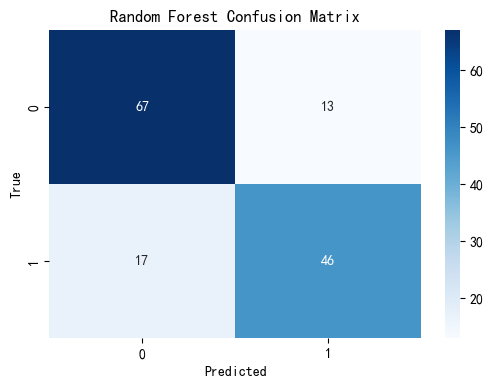

In [76]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Our Random Forest model achieved an accuracy of approximately *0.790*, indicating that it correctly predicted survival outcomes nearly 79% of the time on the test set. This performance demonstrates Random Forest's ability to handle complex, real-world datasets effectively.

The confusion matrix reveals that the model correctly predicted **67 non-survivors and 46 survivors**, while it misclassified **13 survivors as non-survivors and 17 non-survivors as survivors**. This suggests a good balance in prediction performance across both classes, with relatively low misclassification rates, especially for survivors—a critical aspect in survival prediction tasks.

To further evaluate the generalizability and stability of the Random Forest model, we now apply **k-fold cross-validation**, which will allow us to assess its performance across different subsets of the dataset. This ensures that the model's performance is not overly dependent on any specific data split and provides a more robust evaluation metric. Let's proceed to cross-validation.

In [78]:
rf_model = RandomForestClassifier(random_state=42)

cv_scores_rf = cross_val_score(rf_model, X, y, cv=5)

print("Random Forest Cross-validation scores:", cv_scores_rf)
print(f"Mean Random Forest cross-validation score: {cv_scores_rf.mean():.4f}")

Random Forest Cross-validation scores: [0.73426573 0.81118881 0.78169014 0.77464789 0.83802817]
Mean Random Forest cross-validation score: 0.7880


The cross-validation results yielded a mean accuracy of approximately **0.7880**, with individual fold scores ranging **from 0.7343 to 0.8380**. This performance indicates that the Random Forest model generalizes well to unseen data and maintains relatively stable accuracy across different folds. Compared to other models tested, it combines both strong predictive accuracy and consistency, which highlights its robustness and suitability for the Titanic classification task.

From these results, we can draw the following conclusions regarding key modeling concepts:

**Overfitting**: The Random Forest model shows minimal signs of overfitting. The small gap between the test accuracy (approximately 0.7902) and the cross-validation mean score (0.7880) suggests that the model does not rely heavily on any specific subset of training data and performs reliably on new data.

**Cross-validation**: The application of 5-fold cross-validation demonstrated the model's generalizability and stability. The narrow range of scores across the folds indicates that Random Forest is less sensitive to data splits and can maintain good performance across various data subsets.

**Bias-variance tradeoff**: The model achieves a strong balance between bias and variance. The high and stable accuracy indicates **low bias**, while the small variability across folds suggests **well-controlled variance**. This makes Random Forest a powerful and balanced predictive model in this context.

### Results Summary and Comparison
To determine the most reliable model for predicting Titanic survival, we compared test accuracy and cross-validation performance across five different classification algorithms.

In [81]:
print("=== Test Accuracy Comparison ===")
print(f"Logistic Regression: {acc:.4f}")
print(f"K-Nearest Neighbors: {knn_acc:.4f}")
print(f"Neural Network: {nn_accuracy:.4f}")
print(f"Decision Tree: {accuracy_dt:.4f}")
print(f"Random Forest: {rf_accuracy:.4f}")

print("\n=== Mean Cross-Validation Score Comparison ===")
print(f"Logistic Regression: {cv_scores.mean():.4f}")
print(f"K-Nearest Neighbors: {cv_scores_knn.mean():.4f}")
print(f"Neural Network: {cv_scores_nn.mean():.4f}")
print(f"Decision Tree: {cv_scores_dt.mean():.4f}")
print(f"Random Forest: {cv_scores_rf.mean():.4f}")

=== Test Accuracy Comparison ===
Logistic Regression: 0.7972
K-Nearest Neighbors: 0.6923
Neural Network: 0.7483
Decision Tree: 0.7063
Random Forest: 0.7902

=== Mean Cross-Validation Score Comparison ===
Logistic Regression: 0.7893
K-Nearest Neighbors: 0.6813
Neural Network: 0.7837
Decision Tree: 0.7599
Random Forest: 0.7880


Based on our evaluation of five classification models—Logistic Regression, K-Nearest Neighbors (KNN), Neural Network, Decision Tree, and Random Forest—we find that Logistic Regression demonstrated the most balanced and reliable performance, achieving the highest accuracy and generalization across different data splits. Random Forest closely followed, benefiting from its ensemble structure that helps reduce overfitting while maintaining strong predictive power. In contrast, K-Nearest Neighbors consistently underperformed, likely due to its sensitivity to local variations and lack of global learning structure. Overall, Logistic Regression and Random Forest emerge as the most effective models for this classification task, offering both interpretability and robustness.

## Conclusion
In this project, we analyzed the Titanic dataset to predict passenger survival using various machine learning models. After performing initial data cleaning, feature encoding, and splitting the dataset into training and testing sets, we explored five classification models: Logistic Regression, K-Nearest Neighbors (KNN), Neural Network (MLPClassifier), Decision Tree, and Random Forest.

Each model was trained and evaluated using both test accuracy and 5-fold cross-validation to assess performance, generalization, and stability. Confusion matrices were generated to visualize prediction results and understand model behavior across classes. We also addressed important modeling considerations such as overfitting, cross-validation reliability, and the bias-variance tradeoff.

Among the models, Logistic Regression and Random Forest delivered the strongest overall performance, combining high accuracy with consistent cross-validation results. KNN, by contrast, showed weaker and more variable performance, likely due to its sensitivity to local patterns. The analysis underscores the importance of model selection, cross-validation, and evaluation metrics in building robust predictive systems.

## Reference
Dataset from Kaggle: https://www.kaggle.com/competitions/titanic/data.

Codes adapted from Class Lecture Notes for Math 10 in Spring 2025 and ChatGPT.

scikit-learn documentation: https://scikit-learn.org/1.5/api/sklearn.html, specific modules linked throughout the project.